# IIS log トリミング

## ファイル整形

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

In [2]:
def input_file(filename):
    """
    This function generates list from text file.
    """
    
    # Input from space-delimited file
    #filename = './inputfiles-hkg/20171027/501_u_ex171027.log'
    f = open(filename, encoding='ascii')
    lines = f.readlines() # 1行毎にファイル終端まで全て読む(改行文字も含まれる List型)
    f.close()
    
    return lines

In [3]:
def irregular_trimming(a):
    keyword_i = a.find(r"AppleWebKit/533.17.9+(KHTML")

    #if "AppleWebKit/533.17.9+(KHTML" in a:
    end_i = a.find(",",keyword_i)
    start_i = a.find(",",end_i+1)
    return a[:end_i] + a[start_i:]

In [4]:
def preprocess_lines(lines):
    # Preprocess file
    FIELD_ROW = 4

    # Remvoe Header
    p_lines = lines[FIELD_ROW-1:]

    # Trim Header
    p_lines[0] = p_lines[0].replace('#Fields: ','')

    # Convert " "(space) to "," for csv format
    # 1. ", => "_": Not to be bothered by default ","
    p_csv_lines = list(map(lambda line: line.replace(",","_").replace(" ",",").replace(",+","+"), p_lines))

    # 追加 あとで複数のキーワードをまとめるようにしましょう
    p_csv_lines = list(filter((lambda x: r"#Software:" not in x),p_csv_lines))
    p_csv_lines = list(filter((lambda x: r"#Version:" not in x),p_csv_lines))
    p_csv_lines = list(filter((lambda x: r"#Date:" not in x),p_csv_lines))
    p_csv_lines = list(filter((lambda x: r"#Fields:" not in x),p_csv_lines))

    # Add an additional column for an irregular data あとでチェック
    #p_csv_lines = list(map(lambda l: l[:-1] + "," + l[-1:] if l.count(",-") == 14 else l, p_csv_lines))

    # Trim line with "AppleWebKit/533.17.9+(KHTML"あとでチェック
    #p_csv_lines = list(map(lambda a: irregular_trimming(a) if "AppleWebKit/533.17.9+(KHTML" in a else a, p_csv_lines))
 
    return p_csv_lines

In [ ]:
# test

In [ ]:
#データフレーム版
tdf = pd.DataFrame(dict(A=[5,3,5,6], C=["foo","bar","fooXYZbar", "bat"]))
tdf

In [ ]:
tdf[tdf.C.str.contains("XYZ") == False]

In [ ]:
df[ 's-port' ] = df[ 's-port' ].astype(np.float).astype(np.int64)
#.astype(int)

* * * 

In [5]:
def output_file(p_csv_lines, filename):
    # Output as csv
    basename = datetime.now().strftime("%Y%m%d-%H%M%S")

    DIVIDED_COUNT = 4

    start_point = [ int(( len(p_csv_lines) / DIVIDED_COUNT ) * x) for x in range(1, DIVIDED_COUNT)]
    start_point.insert(0,0)

    #print(start_point)
    for index in range(len(start_point)):

        if len(start_point) == index + 1:
            print("{} - {}".format(start_point[index],""))
            start_i = start_point[index]

            output_filename = filename[:filename.find(".log")]+ "_" + basename + "_" + str(index) + '.csv'
            f = open(output_filename, 'w')
            f.writelines(p_csv_lines[start_i:]) # 1行毎にファイル終端まで全て読む(改行文字も含まれる List型)
            f.close()
            break

        else:
            print("{} - {}".format(start_point[index],start_point[index+1]))
            start_i = start_point[index]
            end_i = start_point[index+1]

            output_filename = filename[:filename.find(".log")]+ "_" + basename + "_" + str(index) + '.csv'
            f = open(output_filename, 'w')
            f.writelines(p_csv_lines[start_i:end_i]) # 1行毎にファイル終端まで全て読む(改行文字も含まれる List型)
            f.close()


In [ ]:
filename = './inputfiles-hkg/20171113_IISLogs/CAS/u_ex171108.log'

lines = input_file(filename)
lines = preprocess_lines(lines)
output_file(lines, filename)

In [ ]:
filename = './inputfiles-hkg/20171027/502_u_ex171027.log'

lines = input_file(filename)
lines = preprocess_lines(lines)
output_file(lines, filename)

# もしフォーマットからずれていたらエラーを出すとかにしたいね。

## 1ファイルの整形

In [8]:
filename = './inputfiles-hkg/20171113_IISLogs/CAS/u_ex171110.log'

lines = input_file(filename)
lines = preprocess_lines(lines)
output_file(lines, filename)

0 - 280553
280553 - 561107
561107 - 841661
841661 - 


## df読み取り

### 1110

In [2]:
df1 = pd.read_csv("./inputfiles-hkg/20171113_IISLogs/CAS/u_ex171110_20171114-155553_0.csv")
df1 = df1.append([pd.read_csv("./inputfiles-hkg/20171113_IISLogs/CAS501/u_ex171110_20171114-155553_1.csv", names = list(df1.columns)),
                pd.read_csv("./inputfiles-hkg/20171113_IISLogs/CAS501/u_ex171110_20171114-155553_2.csv", names = list(df1.columns)),
                pd.read_csv("./inputfiles-hkg/20171113_IISLogs/CAS501/u_ex171110_20171114-155553_3.csv", names = list(df1.columns)),
               ], ignore_index=True)

In [3]:
df2 = pd.read_csv("./inputfiles-hkg/20171113_IISLogs/CAS/u_ex171110_20171114-155635_0.csv")
df2 = df2.append([pd.read_csv("./inputfiles-hkg/20171113_IISLogs/CAS/u_ex171110_20171114-155635_1.csv", names = list(df2.columns)),
                pd.read_csv("./inputfiles-hkg/20171113_IISLogs/CAS/u_ex171110_20171114-155635_2.csv", names = list(df2.columns)),
                    pd.read_csv("./inputfiles-hkg/20171113_IISLogs/CAS/u_ex171110_20171114-155635_3.csv", names = list(df2.columns))
               ], ignore_index=True)

In [4]:
df3 = pd.read_csv("./inputfiles-hkg/20171113_IISLogs/CAS/u_ex171110_20171114-155658_0.csv")
df3 = df3.append([pd.read_csv("./inputfiles-hkg/20171113_IISLogs/CAS/u_ex171110_20171114-155658_1.csv", names = list(df3.columns)),
                pd.read_csv("./inputfiles-hkg/20171113_IISLogs/CAS/u_ex171110_20171114-155658_2.csv", names = list(df3.columns)),
                pd.read_csv("./inputfiles-hkg/20171113_IISLogs/CAS/u_ex171110_20171114-155658_3.csv", names = list(df3.columns))
               ], ignore_index=True)

In [5]:
df = pd.concat([df1, df2, df3])

In [7]:
df.count()

date               4190589
time               4190589
s-ip               4190589
cs-method          4190589
cs-uri-stem        4190589
cs-uri-query       4190589
s-port             4190589
cs-username        4190589
c-ip               4190589
cs(User-Agent)     4190589
cs(Referer)        4190589
sc-status          4190589
sc-substatus       4190589
sc-win32-status    4190589
time-taken         4190589
dtype: int64

## 該当ユーザ抽出

In [20]:
#ここもだいじ　na=False

In [21]:
df_p1 = df[df['cs-username'].str.contains('pppp1', na=False)]

In [22]:
df_p1.to_csv("pppp1_10-oct.csv")

In [23]:
df_p1.count()

date               656
time               656
s-ip               656
cs-method          656
cs-uri-stem        656
cs-uri-query       656
s-port             656
cs-username        656
c-ip               656
cs(User-Agent)     656
cs(Referer)        656
sc-status          656
sc-substatus       656
sc-win32-status    656
time-taken         656
dtype: int64

In [11]:
datetime = pd.Series(df_p1['date'] + " " + df_p1['time'])
datetime

0          2017-11-10 00:00:00
1          2017-11-10 00:00:00
2          2017-11-10 00:00:00
3          2017-11-10 00:00:00
4          2017-11-10 00:00:00
5          2017-11-10 00:00:00
6          2017-11-10 00:00:00
7          2017-11-10 00:00:00
8          2017-11-10 00:00:00
9          2017-11-10 00:00:00
10         2017-11-10 00:00:00
11         2017-11-10 00:00:00
12         2017-11-10 00:00:00
13         2017-11-10 00:00:00
14         2017-11-10 00:00:00
15         2017-11-10 00:00:00
16         2017-11-10 00:00:00
17         2017-11-10 00:00:00
18         2017-11-10 00:00:00
19         2017-11-10 00:00:00
20         2017-11-10 00:00:00
21         2017-11-10 00:00:00
22         2017-11-10 00:00:00
23         2017-11-10 00:00:00
24         2017-11-10 00:00:00
25         2017-11-10 00:00:00
26         2017-11-10 00:00:00
27         2017-11-10 00:00:00
28         2017-11-10 00:00:00
29         2017-11-10 00:00:00
                  ...         
1122184    2017-11-10 23:59:54
1122185 

In [12]:
# Create datetime column
df_p1['datetime'] = datetime

In [1]:
df_p1.tail()

NameError: name 'df_p1' is not defined

## インデックスを日付に変更

In [14]:
# Update index
df_p1 = df_p1.set_index(datetime)

In [15]:
df_p1.index = pd.to_datetime(df_p1.index, utc=True)
df_p1.index

DatetimeIndex(['2017-11-10 00:00:00+00:00', '2017-11-10 00:00:00+00:00',
               '2017-11-10 00:00:00+00:00', '2017-11-10 00:00:00+00:00',
               '2017-11-10 00:00:00+00:00', '2017-11-10 00:00:00+00:00',
               '2017-11-10 00:00:00+00:00', '2017-11-10 00:00:00+00:00',
               '2017-11-10 00:00:00+00:00', '2017-11-10 00:00:00+00:00',
               ...
               '2017-11-10 23:59:57+00:00', '2017-11-10 23:59:57+00:00',
               '2017-11-10 23:59:57+00:00', '2017-11-10 23:59:57+00:00',
               '2017-11-10 23:59:58+00:00', '2017-11-10 23:59:58+00:00',
               '2017-11-10 23:59:58+00:00', '2017-11-10 23:59:58+00:00',
               '2017-11-10 23:59:58+00:00', '2017-11-10 23:59:59+00:00'],
              dtype='datetime64[ns, UTC]', length=4190589, freq=None)

In [16]:
df_p1['datetime'] = pd.to_datetime(df_p1['datetime'], utc=True)

In [17]:
df_p1.count()

date               4190589
time               4190589
s-ip               4190589
cs-method          4190589
cs-uri-stem        4190589
cs-uri-query       4190589
s-port             4190589
cs-username        4190589
c-ip               4190589
cs(User-Agent)     4190589
cs(Referer)        4190589
sc-status          4190589
sc-substatus       4190589
sc-win32-status    4190589
time-taken         4190589
datetime           4190589
dtype: int64

In [2]:
df_p1.head()

NameError: name 'df_p1' is not defined

## 不要カラムの削除

In [19]:
#df_p1 = df_p1.drop(['date','time'], axis=1)

# 描画

In [21]:
import seaborn as sns

%matplotlib inline

In [22]:
df_p1.columns

Index(['s-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query', 's-port',
       'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)', 'sc-status',
       'sc-substatus', 'sc-win32-status', 'time-taken', 'datetime'],
      dtype='object')

In [23]:
df_p1.dtypes

s-ip                       object
cs-method                  object
cs-uri-stem                object
cs-uri-query               object
s-port                      int64
cs-username                object
c-ip                       object
cs(User-Agent)             object
cs(Referer)                object
sc-status                   int64
sc-substatus                int64
sc-win32-status             int64
time-taken                  int64
datetime           datetime64[ns]
dtype: object

In [ ]:
## 時間帯で指定

In [51]:
tdf = df_p1.between_time(start_time='9:30', end_time='10:30') 

In [53]:
tdf.count()
tdf.to_csv("all_log_10-Nov_0930-1030.csv")

In [ ]:
## 描画の続き

In [24]:
# 複数指定はlistで。
df_p1_grpby = df_p1.groupby(["cs-method","sc-status"]).resample('10T')['cs-username'].count()
df_p1_grpby

cs-method     sc-status                           
GET           200        2017-11-10 00:00:00+00:00    417
                         2017-11-10 00:10:00+00:00    395
                         2017-11-10 00:20:00+00:00    414
                         2017-11-10 00:30:00+00:00    391
                         2017-11-10 00:40:00+00:00    409
                         2017-11-10 00:50:00+00:00    385
                         2017-11-10 01:00:00+00:00    480
                         2017-11-10 01:10:00+00:00    438
                         2017-11-10 01:20:00+00:00    419
                         2017-11-10 01:30:00+00:00    393
                         2017-11-10 01:40:00+00:00    442
                         2017-11-10 01:50:00+00:00    388
                         2017-11-10 02:00:00+00:00    451
                         2017-11-10 02:10:00+00:00    389
                         2017-11-10 02:20:00+00:00    554
                         2017-11-10 02:30:00+00:00    402
                     

In [25]:
df_p1_grpby = df_p1_grpby.unstack(['cs-method','sc-status'], fill_value=0)

In [26]:
df_p1_grpby.head()

cs-method                    GET                                     HEAD      \
sc-status                    200 206 242    302    401    403    404  200 401   
2017-11-10 00:00:00+00:00  417.0 NaN NaN  188.0  212.0  133.0   54.0  NaN NaN   
2017-11-10 00:10:00+00:00  395.0 NaN NaN  176.0  290.0  129.0   79.0  NaN NaN   
2017-11-10 00:20:00+00:00  414.0 NaN NaN  188.0  353.0  144.0  108.0  NaN NaN   
2017-11-10 00:30:00+00:00  391.0 NaN NaN  176.0  489.0  153.0  137.0  NaN NaN   
2017-11-10 00:40:00+00:00  409.0 NaN NaN  188.0  776.0  173.0  263.0  NaN NaN   

cs-method                 OPTIONS ...  POST     RPC_IN_DATA                 \
sc-status                     200 ...   500 503         200     401    404   
2017-11-10 00:00:00+00:00   108.0 ...  23.0 NaN       426.0  1104.0  216.0   
2017-11-10 00:10:00+00:00    88.0 ...  31.0 NaN       598.0  1472.0  210.0   
2017-11-10 00:20:00+00:00   115.0 ...  28.0 NaN       639.0  1595.0  198.0   
2017-11-10 00:30:00+00:00   120.0 ...  32.0 NaN       982.0  2322.0  245.0   
2017-11-10 00:40:00+00:00   129.0 ...  26.0 NaN      1459.0  3495.0  284.0   

cs-method                      RPC_OUT_DATA                     
sc-status                  500          200     401    404 500  
2017-11-10 00:00:00+00:00  2.0        395.0  1076.0  216.0 NaN  
2017-11-10 00:10:00+00:00  0.0        564.0  1451.0  210.0 NaN  
2017-11-10 00:20:00+00:00  1.0        590.0  1576.0  198.0 NaN  
2017-11-10 00:30:00+00:00  0.0        896.0  2273.0  222.0 NaN  
2017-11-10 00:40:00+00:00  0.0       1295.0  3437.0  248.0 NaN  

[5 rows x 26 columns]

In [27]:
df_p1_grpby.columns

MultiIndex(levels=[['GET', 'HEAD', 'OPTIONS', 'POST', 'RPC_IN_DATA', 'RPC_OUT_DATA'], [200, 206, 242, 302, 401, 403, 404, 440, 500, 503]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5], [0, 1, 2, 3, 4, 5, 6, 0, 4, 0, 4, 0, 3, 4, 6, 7, 8, 9, 0, 4, 6, 8, 0, 4, 6, 8]],
           names=['cs-method', 'sc-status'])

In [28]:
df_p1_grpby.head(2)

cs-method                    GET                                    HEAD      \
sc-status                    200 206 242    302    401    403   404  200 401   
2017-11-10 00:00:00+00:00  417.0 NaN NaN  188.0  212.0  133.0  54.0  NaN NaN   
2017-11-10 00:10:00+00:00  395.0 NaN NaN  176.0  290.0  129.0  79.0  NaN NaN   

cs-method                 OPTIONS ...  POST     RPC_IN_DATA                 \
sc-status                     200 ...   500 503         200     401    404   
2017-11-10 00:00:00+00:00   108.0 ...  23.0 NaN       426.0  1104.0  216.0   
2017-11-10 00:10:00+00:00    88.0 ...  31.0 NaN       598.0  1472.0  210.0   

cs-method                      RPC_OUT_DATA                     
sc-status                  500          200     401    404 500  
2017-11-10 00:00:00+00:00  2.0        395.0  1076.0  216.0 NaN  
2017-11-10 00:10:00+00:00  0.0        564.0  1451.0  210.0 NaN  

[2 rows x 26 columns]

In [29]:
df_p1_grpby.tail()

cs-method                    GET                                HEAD      \
sc-status                    200 206 242    302   401 403   404  200 401   
2017-11-10 23:10:00+00:00  391.0 NaN NaN  179.0  68.0 NaN  11.0  NaN NaN   
2017-11-10 23:20:00+00:00  401.0 NaN NaN  185.0  74.0 NaN   8.0  NaN NaN   
2017-11-10 23:30:00+00:00  398.0 NaN NaN  179.0  83.0 NaN   9.0  NaN NaN   
2017-11-10 23:40:00+00:00  403.0 NaN NaN  185.0  72.0 NaN   7.0  NaN NaN   
2017-11-10 23:50:00+00:00  396.0 NaN NaN  179.0  78.0 NaN   6.0  NaN NaN   

cs-method                 OPTIONS ...  POST     RPC_IN_DATA                \
sc-status                     200 ...   500 503         200   401 404 500   
2017-11-10 23:10:00+00:00    62.0 ...  23.0 NaN        70.0  55.0 NaN NaN   
2017-11-10 23:20:00+00:00    40.0 ...  22.0 NaN        75.0  47.0 NaN NaN   
2017-11-10 23:30:00+00:00    32.0 ...  22.0 NaN        44.0  51.0 NaN NaN   
2017-11-10 23:40:00+00:00    48.0 ...  23.0 NaN        36.0  33.0 NaN NaN   
2017-11-10 23:50:00+00:00    27.0 ...  22.0 NaN        56.0  66.0 NaN NaN   

cs-method                 RPC_OUT_DATA                
sc-status                          200   401 404 500  
2017-11-10 23:10:00+00:00         52.0  37.0 NaN NaN  
2017-11-10 23:20:00+00:00         57.0  29.0 NaN NaN  
2017-11-10 23:30:00+00:00         20.0  27.0 NaN NaN  
2017-11-10 23:40:00+00:00         20.0  17.0 NaN NaN  
2017-11-10 23:50:00+00:00         36.0  46.0 NaN NaN  

[5 rows x 26 columns]

In [31]:
# 404がint型なのに注意。。。だから''は無し。
#df_p1_grpby.loc[:, [('GET', 404)]].tail()
df_p1_grpby.loc[:, [('GET')]].tail()

cs-method                    GET                               
sc-status                    200 206 242    302   401 403   404
2017-11-10 23:10:00+00:00  391.0 NaN NaN  179.0  68.0 NaN  11.0
2017-11-10 23:20:00+00:00  401.0 NaN NaN  185.0  74.0 NaN   8.0
2017-11-10 23:30:00+00:00  398.0 NaN NaN  179.0  83.0 NaN   9.0
2017-11-10 23:40:00+00:00  403.0 NaN NaN  185.0  72.0 NaN   7.0
2017-11-10 23:50:00+00:00  396.0 NaN NaN  179.0  78.0 NaN   6.0

In [32]:
l_g404_count = list(df_p1_grpby.loc[:, [('GET', 404)]].values.reshape(-1))

l_g200_count = list(df_p1_grpby.loc[:, [('GET', 200)]].values.reshape(-1))
l_g206_count = list(df_p1_grpby.loc[:, [('GET', 206)]].values.reshape(-1))
l_g242_count = list(df_p1_grpby.loc[:, [('GET', 242)]].values.reshape(-1))
l_g302_count = list(df_p1_grpby.loc[:, [('GET', 302)]].values.reshape(-1))
l_g401_count = list(df_p1_grpby.loc[:, [('GET', 401)]].values.reshape(-1))
l_g403_count = list(df_p1_grpby.loc[:, [('GET', 403)]].values.reshape(-1))

In [33]:
df_p1_grpby.loc[:, [('HEAD')]].tail()

cs-method                 HEAD    
sc-status                  200 401
2017-11-10 23:10:00+00:00  NaN NaN
2017-11-10 23:20:00+00:00  NaN NaN
2017-11-10 23:30:00+00:00  NaN NaN
2017-11-10 23:40:00+00:00  NaN NaN
2017-11-10 23:50:00+00:00  NaN NaN

In [34]:
l_h200_count = list(df_p1_grpby.loc[:, [('HEAD', 200)]].values.reshape(-1))
l_h401_count = list(df_p1_grpby.loc[:, [('HEAD', 401)]].values.reshape(-1))

In [35]:
df_p1_grpby.loc[:, [('OPTIONS')]].tail()

cs-method                 OPTIONS      
sc-status                     200   401
2017-11-10 23:10:00+00:00    62.0  79.0
2017-11-10 23:20:00+00:00    40.0  50.0
2017-11-10 23:30:00+00:00    32.0  41.0
2017-11-10 23:40:00+00:00    48.0  57.0
2017-11-10 23:50:00+00:00    27.0  38.0

In [36]:
l_o200_count = list(df_p1_grpby.loc[:, [('OPTIONS', 200)]].values.reshape(-1))
l_o401_count = list(df_p1_grpby.loc[:, [('OPTIONS', 401)]].values.reshape(-1))

In [37]:
df_p1_grpby.loc[:, [('POST')]].tail()

cs-method                    POST                                    
sc-status                     200   302     401     404 440   500 503
2017-11-10 23:10:00+00:00  1136.0  67.0  7081.0  3105.0 NaN  23.0 NaN
2017-11-10 23:20:00+00:00  2087.0  69.0  5314.0  2007.0 NaN  22.0 NaN
2017-11-10 23:30:00+00:00  1726.0  67.0  8014.0  3405.0 NaN  22.0 NaN
2017-11-10 23:40:00+00:00  1189.0  69.0  7100.0  3119.0 NaN  23.0 NaN
2017-11-10 23:50:00+00:00  2555.0  67.0  5737.0  1954.0 NaN  22.0 NaN

In [38]:
l_p200_count = list(df_p1_grpby.loc[:, [('POST', 200)]].values.reshape(-1))

l_p302_count = list(df_p1_grpby.loc[:, [('POST', 302)]].values.reshape(-1))
l_p401_count = list(df_p1_grpby.loc[:, [('POST', 401)]].values.reshape(-1))
l_p404_count = list(df_p1_grpby.loc[:, [('POST', 404)]].values.reshape(-1))
l_p440_count = list(df_p1_grpby.loc[:, [('POST', 440)]].values.reshape(-1))
l_p500_count = list(df_p1_grpby.loc[:, [('POST', 500)]].values.reshape(-1))
l_p503_count = list(df_p1_grpby.loc[:, [('POST', 503)]].values.reshape(-1))

In [39]:
df_p1_grpby.loc[:, [('RPC_IN_DATA')]].tail()

cs-method                 RPC_IN_DATA              
sc-status                         200   401 404 500
2017-11-10 23:10:00+00:00        70.0  55.0 NaN NaN
2017-11-10 23:20:00+00:00        75.0  47.0 NaN NaN
2017-11-10 23:30:00+00:00        44.0  51.0 NaN NaN
2017-11-10 23:40:00+00:00        36.0  33.0 NaN NaN
2017-11-10 23:50:00+00:00        56.0  66.0 NaN NaN

In [40]:
df_p1_grpby.loc[:, [('RPC_OUT_DATA')]].tail()

cs-method                 RPC_OUT_DATA              
sc-status                          200   401 404 500
2017-11-10 23:10:00+00:00         52.0  37.0 NaN NaN
2017-11-10 23:20:00+00:00         57.0  29.0 NaN NaN
2017-11-10 23:30:00+00:00         20.0  27.0 NaN NaN
2017-11-10 23:40:00+00:00         20.0  17.0 NaN NaN
2017-11-10 23:50:00+00:00         36.0  46.0 NaN NaN

In [41]:
l_in200_count = list(df_p1_grpby.loc[:, [('RPC_IN_DATA', 200)]].values.reshape(-1))
l_in401_count = list(df_p1_grpby.loc[:, [('RPC_IN_DATA', 401)]].values.reshape(-1))
l_in404_count = list(df_p1_grpby.loc[:, [('RPC_IN_DATA', 404)]].values.reshape(-1))
l_in500_count = list(df_p1_grpby.loc[:, [('RPC_IN_DATA', 500)]].values.reshape(-1))

l_ou200_count = list(df_p1_grpby.loc[:, [('RPC_OUT_DATA', 200)]].values.reshape(-1))
l_ou401_count = list(df_p1_grpby.loc[:, [('RPC_OUT_DATA', 401)]].values.reshape(-1))
l_ou404_count = list(df_p1_grpby.loc[:, [('RPC_OUT_DATA', 404)]].values.reshape(-1))
l_ou500_count = list(df_p1_grpby.loc[:, [('RPC_OUT_DATA', 500)]].values.reshape(-1))

In [42]:
import numpy as np

In [43]:
df_p1_g = pd.DataFrame(index = df_p1_grpby.loc[:, [('GET', 404)]].index)

In [44]:
df_p1_g["GET_404"] = l_g404_count
df_p1_g["GET_200"] = l_g200_count
df_p1_g["GET_206"] = l_g206_count
df_p1_g["GET_242"] = l_g242_count
df_p1_g["GET_302"] = l_g302_count
df_p1_g["GET_401"] = l_g401_count
df_p1_g["GET_403"] = l_g403_count

df_p1_g["HEAD_200"] = l_h200_count
df_p1_g["HEAD_401"] = l_h401_count

df_p1_g["OPTIONS_200"] = l_o200_count
df_p1_g["OPTIONS_401"] = l_o401_count

df_p1_g["POST_200"] = l_p200_count
df_p1_g["POST_302"] = l_p302_count
df_p1_g["POST_401"] = l_p401_count
df_p1_g["POST_404"] = l_p404_count
df_p1_g["POST_440"] = l_p440_count
df_p1_g["POST_500"] = l_p500_count
df_p1_g["POST_503"] = l_p503_count

df_p1_g["PRC_IN_DATA_200"] = l_in200_count
df_p1_g["PRC_IN_DATA_401"] = l_in401_count
df_p1_g["PRC_IN_DATA_404"] = l_in404_count
df_p1_g["PRC_IN_DATA_500"] = l_in500_count

df_p1_g["PRC_OUT_DATA_200"] = l_ou200_count
df_p1_g["PRC_OUT_DATA_401"] = l_ou401_count
df_p1_g["PRC_OUT_DATA_404"] = l_ou404_count
df_p1_g["PRC_OUT_DATA_500"] = l_ou500_count

In [46]:
df_p1_g["GET_404"] = l_g404_count
df_p1_g["POST_200"] = l_p200_count
df_p1_g["PRC_IN_DATA_200"] = l_in200_count
df_p1_g["PRC_OUT_DATA_200"] = l_ou200_count

In [47]:
#df_p1_g["datetime"] = df_p1_g.index

In [45]:
df_p1_g.head()

,GET_404,GET_200,GET_206,GET_242,GET_302,GET_401,GET_403,HEAD_200,HEAD_401,OPTIONS_200,...,POST_500,POST_503,PRC_IN_DATA_200,PRC_IN_DATA_401,PRC_IN_DATA_404,PRC_IN_DATA_500,PRC_OUT_DATA_200,PRC_OUT_DATA_401,PRC_OUT_DATA_404,PRC_OUT_DATA_500
2017-11-10 00:00:00+00:00,54.0,417.0,NaN,NaN,188.0,212.0,133.0,NaN,NaN,108.0,...,23.0,NaN,426.0,1104.0,216.0,2.0,395.0,1076.0,216.0,NaN
2017-11-10 00:10:00+00:00,79.0,395.0,NaN,NaN,176.0,290.0,129.0,NaN,NaN,88.0,...,31.0,NaN,598.0,1472.0,210.0,0.0,564.0,1451.0,210.0,NaN
2017-11-10 00:20:00+00:00,108.0,414.0,NaN,NaN,188.0,353.0,144.0,NaN,NaN,115.0,...,28.0,NaN,639.0,1595.0,198.0,1.0,590.0,1576.0,198.0,NaN
2017-11-10 00:30:00+00:00,137.0,391.0,NaN,NaN,176.0,489.0,153.0,NaN,NaN,120.0,...,32.0,NaN,982.0,2322.0,245.0,0.0,896.0,2273.0,222.0,NaN
2017-11-10 00:40:00+00:00,263.0,409.0,NaN,NaN,188.0,776.0,173.0,NaN,NaN,129.0,...,26.0,NaN,1459.0,3495.0,284.0,0.0,1295.0,3437.0,248.0,NaN


In [46]:
df_p1_g.to_csv("all_10-oct_cross-tab.csv")

In [48]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')

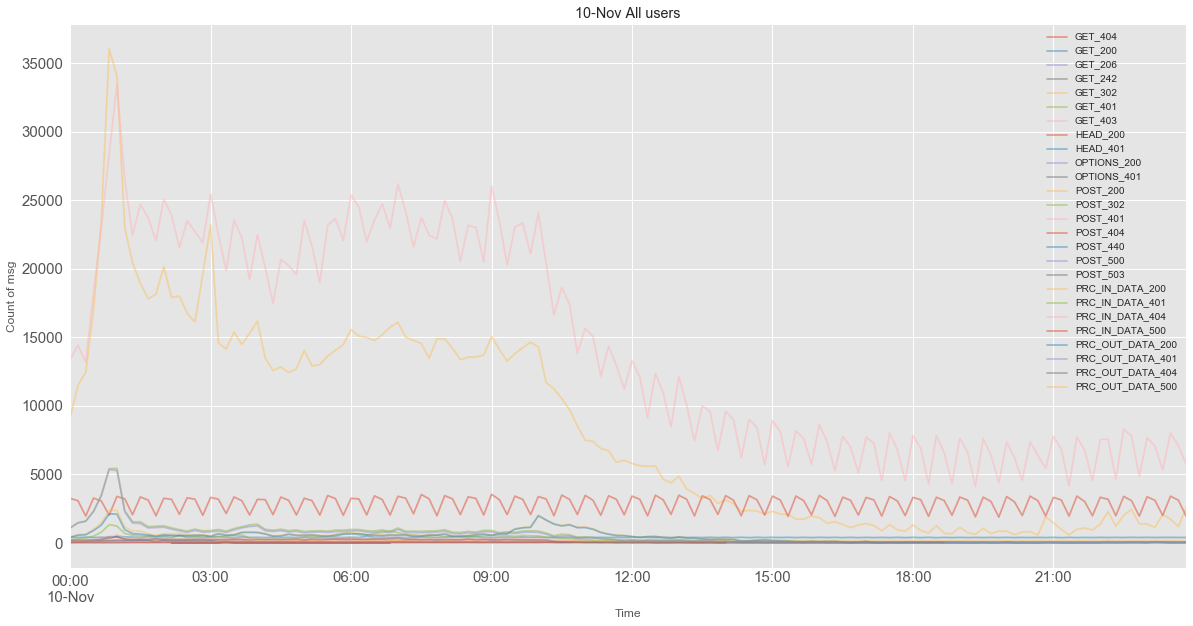

In [50]:
title='10-Nov All users'
ax = df_p1_g.plot(figsize=(20,10), alpha=0.5, fontsize=15,grid=True, title=title)
ax.set(xlabel="Time", ylabel="Count of msg")
#ax.set_xlabel("Time")
#ax.set_ylabel("Count of msg")
ax.grid(True, which='both')
plt.savefig("10-Nov_all_users.png")

# Appendix

In [ ]:
ax = sns.tsplot(time="datetime", value='GET_404', data=df_p1_g)

In [ ]:
var = 'datetime'
facet = sns.FacetGrid( df , aspect=4 , row = 'cs-method' , col = None )
facet.map( sns.tsplot , var , shade= True )
facet.set( xlim=( 0 , df[ var ].max() ) )
facet.add_legend()

In [ ]:
# Plot distributions of Age of passangers who survived or did not survive
plot_distribution( train_df , var = 'Age' , target = 'Survived' , row = 'Sex' )

In [ ]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="cs-method", row_order=ordered_days,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

In [ ]:
df_p1_g 

In [ ]:
var = 'datetime'
facet = sns.FacetGrid( df_p1_grpby_g , hue='count' , aspect=4 , row = 'cs-method')
facet.map( sns.kdeplot , var , shade= True )
facet.set( xlim=( 0 , df[ var ].max() ) )
facet.add_legend()

In [ ]:
sns.barplot(hue= 'cs-method', data=df_p1_g)

In [ ]:
df_p1_g.plot()

In [ ]:
var = 'datetime'
facet = sns.FacetGrid( df_p1_g , hue='count' , aspect=4 , row = 'cs-method')
facet.map( sns.kdeplot , var , shade= True )
facet.set( xlim=( 0 , df[ var ].max() ) )
facet.add_legend()

In [ ]:
#var = [x for x in df_p1_grpby_g.index]
var = 'datetime'
facet = sns.FacetGrid( df_p1_grpby_g , hue='count' , aspect=4 , row = 'cs-method')
facet.map( sns.kdeplot , var , shade= True )
facet.set( xlim=( 0 , df[ var ].max() ) )
facet.add_legend()

In [ ]:
df_p1_grpby = df_p1.groupby(['datetime', 'sc-status', 'cs-method'])
df_p1_grpby_g = df_p1_grpby['cs-username'].agg(['count']).reset_index()

In [ ]:
df_p1_grpby.head(10)

In [ ]:
df_p1_grpby_g.head()

In [ ]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x=[x for x in df_p1_grpby_g.index], y='count', hue= 'sc-status', data=df_p1_grpby_g)

In [ ]:
df2 = pd.read_csv("./inputfiles-hkg/20171027/502_u_ex171027_20171110-195213_0.csv")
df2 = df.append([pd.read_csv("./inputfiles-hkg/20171027/502_u_ex171027_20171110-195213_1.csv", names = list(df.columns)),
                pd.read_csv("./inputfiles-hkg/20171027/502_u_ex171027_20171110-195213_2.csv", names = list(df.columns)),
                pd.read_csv("./inputfiles-hkg/20171027/502_u_ex171027_20171110-195213_3.csv", names = list(df.columns))], ignore_index=True)

In [ ]:
df2[df2['cs-username'].str.contains('ppp1', na=False)]

In [ ]:
df3 = pd.read_csv("./inputfiles-hkg/20171027/503_u_ex171027_20171110-195235_0.csv")
df3 = df.append([pd.read_csv("./inputfiles-hkg/20171027/503_u_ex171027_20171110-195235_1.csv", names = list(df.columns)),
                pd.read_csv("./inputfiles-hkg/20171027/503_u_ex171027_20171110-195235_2.csv", names = list(df.columns)),
                pd.read_csv("./inputfiles-hkg/20171027/503_u_ex171027_20171110-195235_3.csv", names = list(df.columns))], ignore_index=True)

In [ ]:
df3[df3['cs-username'].str.contains('ppp1', na=False)]